In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import pandas_profiling
import re 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [389]:
titanic_dataset_1 =pd.read_csv(r"C:\Users\YASHA\Downloads\train.csv")
titanic_dataset_2 =pd.read_csv(r"C:\Users\YASHA\Downloads\train.csv")

In [390]:
titanic_dataset_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [391]:
titanic_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [392]:
titanic_dataset_1.shape

(891, 12)

In [393]:
titanic_dataset_1[titanic_dataset_1['Embarked'].isna()].index

Int64Index([61, 829], dtype='int64')

In [394]:
titanic_dataset_1.iloc[61:62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [395]:
titanic_dataset_1.iloc[829:830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [396]:
titanic_dataset_1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

As We Know in Embarked Column,                                                                                                 
--S is Southhampton(England) -- Q is Queenstown(Ireland) -- C is Cherbourg(France)                                             
Amelie is a name of a girl which was more popular in french. So,Emabarked value for index 61 is 'C'.                           
George Nelson and his wife Martha Evelyn this two name are of British Origin,                                                  
So, we can say their are maximum possiblity that she was british. So,Embarked value for index 829 is 'S'.


In [451]:
titanic_dataset_1.iloc[61:62]['Embarked'] = 'C'
titanic_dataset_1.iloc[829:830]['Embarked'] = 'S'

In [452]:
titanic_dataset_1[61:62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,C


In [399]:
titanic_dataset_1[829:830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [400]:
titanic_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [401]:
corr = titanic_dataset_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,-0.369226,0.0830814,0.0184427,-0.5495
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,0.0960667,0.159651,0.216225,1


In [402]:
a = pd.DataFrame(titanic_dataset_1)
b = pd.DataFrame(titanic_dataset_1[~titanic_dataset_1['Age'].isna()])
b

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [403]:
corr = b.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,0.0293402,-0.0353491,0.0368472,-0.0823977,-0.0116174,0.00959178
Survived,0.0293402,1,-0.359653,-0.0772211,-0.0173584,0.093317,0.268189
Pclass,-0.0353491,-0.359653,1,-0.369226,0.0672474,0.0256831,-0.554182
Age,0.0368472,-0.0772211,-0.369226,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0823977,-0.0173584,0.0672474,-0.308247,1,0.38382,0.138329
Parch,-0.0116174,0.093317,0.0256831,-0.189119,0.38382,1,0.205119
Fare,0.00959178,0.268189,-0.554182,0.0960667,0.138329,0.205119,1


In [404]:
titanic_dataset_1.drop(['Cabin'], axis = 1, inplace = True)

In [405]:
titanic_dataset_1.shape

(891, 11)

In [406]:
titanic_dataset_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [407]:
# Male == 0 & Female == 1
c = pd.DataFrame(titanic_dataset_1[titanic_dataset_1['Sex'] == 'male'])
d = pd.DataFrame(titanic_dataset_1[titanic_dataset_1['Sex'] == 'female'])
c.at[:,'Sex']=1
d.at[:,'Sex']=0
df = pd.concat([c, d])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,S
13,14,0,3,"Andersson, Mr. Anders Johan",1,39.0,1,5,347082,31.2750,S
16,17,0,3,"Rice, Master. Eugene",1,2.0,4,1,382652,29.1250,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,S
20,21,0,2,"Fynney, Mr. Joseph J",1,35.0,0,0,239865,26.0000,S


In [408]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.035144,0.0429389,0.0368472,-0.0575268,-0.00165201,0.0126582
Survived,-0.00500666,1,-0.338481,-0.543351,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.035144,-0.338481,1,0.1319,-0.369226,0.0830814,0.0184427,-0.5495
Sex,0.0429389,-0.543351,0.1319,1,0.0932536,-0.114631,-0.245489,-0.182333
Age,0.0368472,-0.0772211,-0.369226,0.0932536,1,-0.308247,-0.189119,0.0960667
SibSp,-0.0575268,-0.0353225,0.0830814,-0.114631,-0.308247,1,0.414838,0.159651
Parch,-0.00165201,0.0816294,0.0184427,-0.245489,-0.189119,0.414838,1,0.216225
Fare,0.0126582,0.257307,-0.5495,-0.182333,0.0960667,0.159651,0.216225,1


In [409]:
df[df['Age'].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,S
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,C
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,S
36,37,1,3,"Mamee, Mr. Hanna",1,NaN,0,0,2677,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",1,NaN,0,0,349253,7.8958,C
45,46,0,3,"Rogers, Mr. William John",1,NaN,0,0,S.C./A.4. 23567,8.0500,S
46,47,0,3,"Lennon, Mr. Denis",1,NaN,1,0,370371,15.5000,Q
48,49,0,3,"Samaan, Mr. Youssef",1,NaN,2,0,2662,21.6792,C
55,56,1,1,"Woolner, Mr. Hugh",1,NaN,0,0,19947,35.5000,S


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [411]:
df['Name']

0                                Braund, Mr. Owen Harris
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
16                                  Rice, Master. Eugene
17                          Williams, Mr. Charles Eugene
20                                  Fynney, Mr. Joseph J
21                                 Beesley, Mr. Lawrence
23                          Sloper, Mr. William Thompson
26                               Emir, Mr. Farred Chehab
27                        Fortune, Mr. Charles Alexander
29                                   Todoroff, Mr. Lalio
30                              Uruchurtu, Don. Manuel E
33                                 Wheadon, Mr. Edward H
34                             

In [412]:
dj = df['Name'].str.findall("\w+\.").value_counts()
print(dj)

[Mr.]          517
[Miss.]        182
[Mrs.]         124
[Master.]       40
[Dr.]            7
[Rev.]           6
[Mlle.]          2
[Col.]           2
[Major.]         2
[Mrs., L.]       1
[Ms.]            1
[Mme.]           1
[Lady.]          1
[Countess.]      1
[Capt.]          1
[Sir.]           1
[Don.]           1
[Jonkheer.]      1
Name: Name, dtype: int64


In [413]:
rj = df[df['Name'].str.contains('Miss\.')]
rj[['Name','Age','SibSp']]

,Name,Age,SibSp
2,"Heikkinen, Miss. Laina",26.0,0
10,"Sandstrom, Miss. Marguerite Rut",4.0,1
11,"Bonnell, Miss. Elizabeth",58.0,0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0,0
22,"McGowan, Miss. Anna ""Annie""",15.0,0
24,"Palsson, Miss. Torborg Danira",8.0,3
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0
32,"Glynn, Miss. Mary Agatha",NaN,0
38,"Vander Planke, Miss. Augusta Maria",18.0,2
39,"Nicola-Yarred, Miss. Jamila",14.0,1


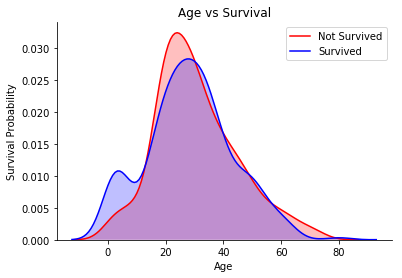

In [414]:
ax = sns.kdeplot(df['Age'][(df['Survived']==0)&(df['Age'].notnull())] , color = 'r',shade = True,label = 'Not Survived')
ax = sns.kdeplot(df['Age'][(df['Survived']==1)&(df['Age'].notnull())] , color = 'b',shade = True,label = 'Survived')
plt.title("Age vs Survival")
plt.xlabel("Age")
plt.ylabel("Survival Probability")
sns.despine()

We can say that survival rate is better for Age Group less than 15 with respect to Died rate

In [415]:
df[df['Age'] <1.1][['Age','Survived','Name']]

,Age,Survived,Name
78,0.83,1,"Caldwell, Master. Alden Gates"
164,1.00,0,"Panula, Master. Eino Viljami"
183,1.00,1,"Becker, Master. Richard F"
305,0.92,1,"Allison, Master. Hudson Trevor"
386,1.00,0,"Goodwin, Master. Sidney Leonard"
755,0.67,1,"Hamalainen, Master. Viljo"
788,1.00,1,"Dean, Master. Bertram Vere"
803,0.42,1,"Thomas, Master. Assad Alexander"
827,1.00,1,"Mallet, Master. Andre"
831,0.83,1,"Richards, Master. George Sibley"


In [416]:
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 80.1+ KB


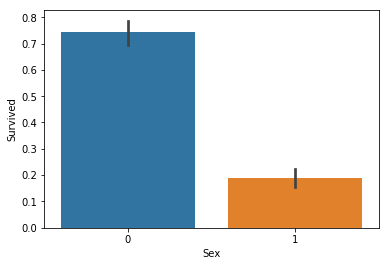

In [418]:
sns.barplot(x = 'Sex' , y = 'Survived',data = df)

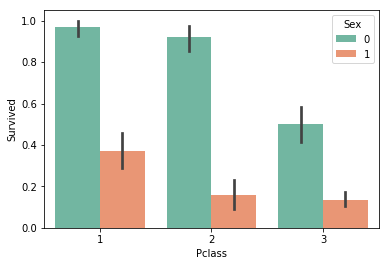

In [419]:
sns.barplot(x = 'Pclass' , y = 'Survived' ,hue = 'Sex' ,  data = df,palette = 'Set2')

In [420]:
df.drop(['Ticket','Name','PassengerId'], axis = 1, inplace =True)

In [421]:
R = df[df['SibSp']>2]
R['Age'].mean()
R.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,1,2.0,3,1,21.0750,2
16,0,3,1,2.0,4,1,29.1250,1
27,0,1,1,19.0,3,2,263.0000,2
50,0,3,1,7.0,4,1,39.6875,2
59,0,3,1,11.0,5,2,46.9000,2


In [422]:
R['Age'].fillna(10 , inplace = True)
R.shape

(46, 8)

In [423]:
# # df = df.apply(lambda df : df['Age'].fillna(10) if df['SibSp']>2 else 
# values = df['Age']
# df['Age'] = values.where(df['Age'] == NaN, others=df[''])

NameError: name 'NaN' is not defined

In [ ]:
S = R.groupby('Age')
S['Survived'].count()

In [ ]:
R.head()

In [ ]:
U= df[df['SibSp'] == 1 ]
U[['Age','Pclass']]
U['Age'].median()
U['Age'].fillna(30)
U.head()

In [450]:
df[df['Age'][df['SibSp']>2]]


KeyError: "None of [Float64Index([ 2.0,  2.0, 19.0,  7.0, 11.0,  4.0,  nan,  1.0,  4.0,  nan,  9.0,\n               nan,  3.0, 16.0,  7.0,  nan,  1.0,  9.0, 14.0, 14.0,  8.0, 10.0,\n               2.0,  nan,  4.0,  8.0, 17.0, 16.0, 33.0, 23.0,  2.0,  nan,  nan,\n               5.0, 24.0,  3.0,  nan,  nan,  9.0, 11.0,  9.0,  2.0, 30.0,  nan,\n               6.0,  nan],\n             dtype='float64')] are in the [columns]"